In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(t^{\prime},x^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $t^{\prime}$ axis to define a line $x(t)$ in frame $K$ that follows the $t^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

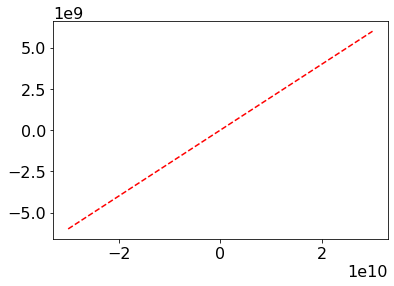

In [107]:
# I made this equation using the Lorentz transformation: x' = gamma * (x+vt), and since x' = 0, the equation becomes
# the following:  x(t) = v * t. I tried using the inverse Lorentz transformation in the beginning and got x(t) = gamma*v*t, but as v 
# appraches c, the x becomes infinite and does not approach the 45 degree light line.
c = constants.c

t = np.linspace(0, 200, num=201, endpoint=True) - 100


def t_prime(v, t):
  tprime = np.zeros((len(t),))
  for i in range(len(t)):
      tprime[i] = v*t[i]
  return tprime


# I plotted to get an idea of what was happening in my code
plt.plot(t*c,t_prime(.2*c, t), 'r--')


<ol start=2>
    <li>Use the fact that $t^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $x(t)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

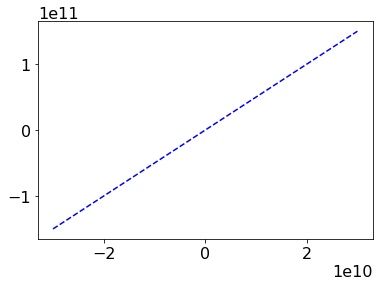

In [108]:
# I made this equation using the Lorentz transformation: t' = gamma * (t + vx/c^2), and since t' = 0, the equation becomes
# the following:  x'(t) = t*c^2 / (v). Again, I tried using the inverse Lorentz equation and got x'(t) = t*c^2 / (gamma*v), 
# but as v appraches c, the axes do not approach 45 degree line. 


t = np.linspace(0, 200, num=201, endpoint=True) - 100

def x_prime(v, t):
  xprime = np.zeros((len(t),))
  for i in range(len(t)):
    xprime[i] = (t[i]*c**2) / (v)
  return xprime


# I plotted to get an idea of what was happening in my code
plt.plot(c*t,x_prime(.2*c,t), 'b--')

<ol start=3>
    <li>The code below creates a figure with centered $(ct,x)$ axes that have range $(-10^{10}, 10^{10})$. We are using $ct$ instead of just $t$ on our horizontal axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $t^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $ct$</strong> for $v = 0.2c$. Make your $t^{\prime}$ and $x^{\prime}$ axes red, and label them in red.</li>
</ol>

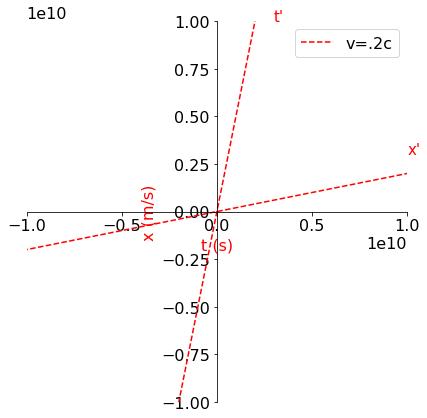

In [110]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the t' and x' axes below
#Plotting the t' axis

ax.plot(c*t,t_prime(.2*c,t), 'r--', label='v=.2c')

#Plotting the x' axis

ax.plot(c*t,x_prime(.2*c,t), 'r--')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below
plt.xlabel("t (s)", color='red')
plt.ylabel("x (m/s)", color='red')
ax.text(1e10,.30e10, r"x'", fontsize = 15, color = "r")
ax.text(.3e10,1e10, r"t'", fontsize = 15, color = "r")
plt.legend()
plt.show()

<ol start=4>
    <li>Make a figure that plots $t^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color.</li>
</ol>

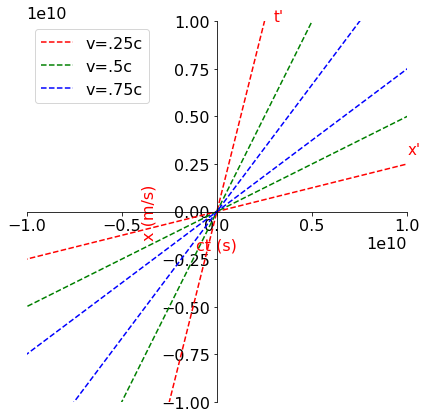

In [113]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the t' and x' axes below
#Plotting the t' axis

ax.plot(c*t,t_prime(.25*c, t), 'r--', label='v=.25c')
ax.plot(c*t,x_prime(.25*c,t), 'r--')

ax.plot(c*t,t_prime(.5*c, t), 'g--', label='v=.5c')
ax.plot(c*t,x_prime(.5*c,t), 'g--')

ax.plot(c*t,t_prime(.75*c, t), 'b--', label='v=.75c')
ax.plot(c*t,x_prime(.75*c,t), 'b--')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below
plt.xlabel("ct (s)", color='red')
plt.ylabel("x (m/s)", color='red')
ax.text(1e10,.30e10, r"x'", fontsize = 15, color = "r")
ax.text(.3e10,1e10, r"t'", fontsize = 15, color = "r")
plt.legend()
plt.show()

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(t^{\prime}, x^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(t^{\prime}, x^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $(t^{\prime}, x^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

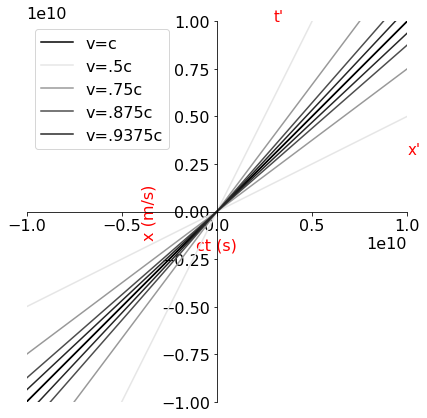

In [112]:
# Set up an array of independent variables t that spans -100 to 100 seconds
t = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the t' and x' axes below
#Plotting the t' axis
ax.plot(c*t,t_prime(c, t), c ='black', label='v=c')
ax.plot(c*t,x_prime(c,t), c ='black')

ax.plot(c*t,t_prime(.5*c, t), c ='.9', label='v=.5c')
ax.plot(c*t,x_prime(.5*c,t), c ='.9')

ax.plot(c*t,t_prime(.75*c, t), c ='.6', label='v=.75c')
ax.plot(c*t,x_prime(.75*c,t), c ='.6')

ax.plot(c*t,t_prime(.875*c, t), c ='.3', label='v=.875c')
ax.plot(c*t,x_prime(.875*c,t), c ='.3')

ax.plot(c*t,t_prime(.9375*c, t), c ='.15', label='v=.9375c')
ax.plot(c*t,x_prime(.9375*c,t), c ='.15')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below
ax.text(1e10,.30e10, r"x'", fontsize = 15, color = "r")
ax.text(.3e10,1e10, r"t'", fontsize = 15, color = "r")
plt.xlabel("ct (s)", color='red')
plt.ylabel("x (m/s)", color='red')
plt.legend()
plt.show()

The successively greater v values approach the 45 degree light line. 